In [8]:
"""
@title: Three Machine Learning Algorithm to Manipulate Linear Regression
@author: LeslieWong & HuangJiaXun
@group: Five
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
# Manipulate linear regression using normal regression
# θ = (XTX)-1XTY
def normalEquation(x,y):
    #ax1 = fig.add_subplot(221)
    #ax4 = fig.add_subplot(224)
    constant = np.ones_like(x)
    new_x = np.vstack((x, constant))
    new_x = new_x.transpose()
    new_y = y.reshape((-1, 1))
    theta = (np.linalg.inv(new_x.transpose().dot(new_x))).dot(new_x.transpose()).dot(new_y)
    theta = theta.reshape((1, -1))
    nor_x = np.linspace(0, 10, N)
    nor_y = np.array(theta[0, 0] * nor_x + theta[0, 1])
    # plot the stimulated line generated by normal equation
    ax1.plot(nor_x, nor_y, c='c', marker='o', alpha=0.2, label='Normal Line')
    ax4.plot(nor_x, nor_y, c='c', marker='o', alpha=0.2, label='Normal Line')


In [10]:
# Manipulate linear regression using sklearn library
def sklearn(x, y):
    # ax2 = fig.add_subplot(222)
    # ax4 = fig.add_subplot(224)
    model = LinearRegression(fit_intercept=True)
    model.fit(x[:, np.newaxis], y)
    xfit = np.linspace(0, 10, N)
    yfit = model.predict(xfit[:, np.newaxis])
    ax2.plot(xfit, yfit, c='y', marker='o', alpha=0.2, label='Sklearn Line')
    ax4.plot(xfit, yfit, c='y', marker='o', alpha=0.2, label='Sklearn Line')

In [11]:

# Manipulate linear regression using gradient descent algorithm
# y = mx + b
def gradientDescent(x, y):
    # ax3 = fig.add_subplot(223)
    # ax4 = fig.add_subplot(224)
    points = np.vstack((x, y))
    learning_rate = 0.01
    initial_m = 0
    initial_b = 0
    num_iterations = 10000
    m_current = initial_m
    b_current = initial_b

    for i in range(num_iterations):
        b_gradient = 0
        m_graident = 0
        for j in range(N):
            temp_x = points[0, j]
            temp_y = points[1, j]
            b_gradient += (1 / N) * ((m_current * temp_x + b_current) - temp_y)
            m_graident += (1 / N) * ((m_current * temp_x + b_current) - temp_y) * temp_x
        new_m = m_current - learning_rate * m_graident
        new_b = b_current - learning_rate * b_gradient
        m_current = new_m
        b_current = new_b
    
    m = m_current
    b = b_current
    gra_x = np.linspace(0, 10, N)
    gra_y = np.array(m * gra_x + b)
    ax3.plot(gra_x, gra_y, c='g', marker='o', alpha=0.2, label='Gradient Descent Line')
    ax4.plot(gra_x, gra_y, c='g', marker='o', alpha=0.2, label='Gradient Descent Line')




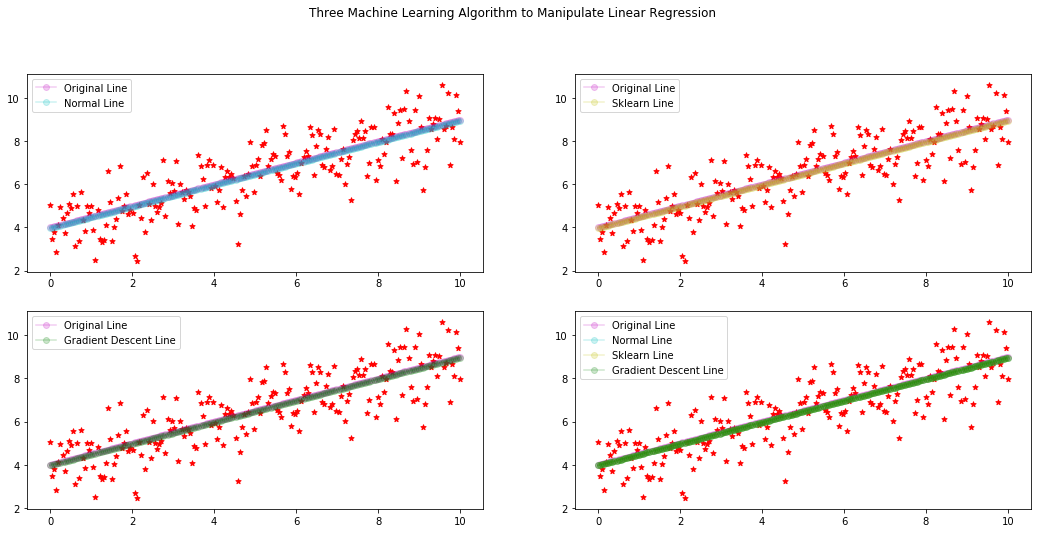

In [12]:
#Define plot instance 
fig = plt.figure(figsize=(18, 8))
# plot for original line and normal line
ax1 = fig.add_subplot(221)
# plot for original line and sklearn line
ax2 = fig.add_subplot(222)
# plot for original line and gradient descent line
ax3 = fig.add_subplot(223)
# plot for original line and all the others
ax4 = fig.add_subplot(224)

# Scatter plot and positive correlation
N = 200
# x = np.array(np.random.rand(1, N) * 10)
x = np.linspace(0, 10, N)
oy = np.array(0.5 * x + 4)
y = np.array(0.5 * x + 4 + np.random.randn(N))


# Plot original line and scatter diagram
ax1.plot(x, oy, c='m', marker='o', alpha=0.2, label='Original Line')
ax2.plot(x, oy, c='m', marker='o', alpha=0.2, label='Original Line')
ax3.plot(x, oy, c='m', marker='o', alpha=0.2, label='Original Line')
ax4.plot(x, oy, c='m', marker='o', alpha=0.2, label='Original Line')
ax1.scatter(x, y, s=30, c='r', marker='*', alpha=1)
ax2.scatter(x, y, s=30, c='r', marker='*', alpha=1)
ax3.scatter(x, y, s=30, c='r', marker='*', alpha=1)
ax4.scatter(x, y, s=30, c='r', marker='*', alpha=1)
normalEquation(x,y)
sklearn(x, y)
gradientDescent(x, y)
# add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
fig.suptitle('Three Machine Learning Algorithm to Manipulate Linear Regression', va="baseline")
plt.show()
# plt.savefig('linearRegression.png', format='png')
